In [1]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#return outliers > mean+3sigma or < mean-3sigma
def outlier_3sigma(pd_column):
    mean_vals = pd_column.mean()
    std_vals = pd_column.std()
    min_value = mean_vals-3*std_vals
    max_value = mean_vals+3*std_vals
    outliers = np.nonzero((pd_column.values>max_value)|(pd_column.values<min_value))
    return outliers

In [3]:
def run_columns(pd_column,idx2):
    for col_header in pd_column.columns:
        idx1 = outlier_3sigma(pd_column[col_header])
        idx2 = np.union1d(idx1,idx2)
        idx2 = np.unique(idx2)
    return idx2

## DEFINING VARIABLES 
**df_without_outlier** --- Variable without outlier with 40% refrigerant leaking

**dfNormal_without_outlier** --- Variable without outlier with full charge of refrigerant

In [4]:
path_to_xls = "F:/Talles/Doutorado/database/1043-RP/FDD Data/Refrigerant leak/rl40.xls"
sheet = "Complete Data Set"
leaking_40 = pd.read_excel(path_to_xls,sheet)
idx2 = np.array([])
idx2 = run_columns(leaking_40,idx2)
df_without_outlier= leaking_40.drop(idx2)
path_to_xls = "F:/Talles/Doutorado/database/1043-RP/FDD Data/Benchmark Tests/normal r.xls"
sheet = "Complete Data Set"
Normal_R = pd.read_excel(path_to_xls,sheet)
idx2 = np.array([])
idx2 = run_columns(Normal_R,idx2)
dfNormal_without_outlier = Normal_R.drop(idx2)
# reseting index
df_without_outlier = df_without_outlier.reset_index(drop=True)
dfNormal_without_outlier = dfNormal_without_outlier.reset_index(drop=True)

# APPLYING STATISTICS

### Correlation Matrix - Variable without outlier with 40% refrigerant leaking

In [5]:
corrMatrix = df_without_outlier.corr()
corrMatrix

,Time,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,...,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB
Time,1.000000,-0.921095,-0.838168,-0.835254,-0.942943,-0.938903,-0.470601,-0.470760,-0.474354,-0.475358,...,-0.130626,NaN,0.110357,-0.158012,-0.401290,-0.706779,-0.768858,0.082838,-0.020319,0.119581
TWE_set,-0.921095,1.000000,0.750391,0.746406,0.967249,0.970232,0.178716,0.176560,0.150138,0.146205,...,0.107653,NaN,0.061492,0.059500,0.114994,0.586085,0.660280,0.078799,0.020723,-0.160500
TEI,-0.838168,0.750391,1.000000,0.997786,0.843395,0.833954,0.237779,0.239952,0.389422,0.393919,...,0.462134,NaN,0.275409,-0.036002,0.136831,0.944215,0.979715,0.284651,0.081919,-0.567380
TWEI,-0.835254,0.746406,0.997786,1.000000,0.841843,0.833275,0.233477,0.233964,0.384982,0.389428,...,0.474145,NaN,0.263279,-0.021789,0.139810,0.944709,0.978159,0.269066,0.073698,-0.569781
TEO,-0.942943,0.967249,0.843395,0.841843,1.000000,0.998323,0.199797,0.198334,0.204636,0.205097,...,0.183227,NaN,0.068378,0.062155,0.134345,0.687450,0.758548,0.100846,0.027624,-0.243494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THI,-0.706779,0.586085,0.944215,0.944709,0.687450,0.676024,0.224346,0.228816,0.414130,0.421953,...,0.531394,NaN,0.342673,-0.072405,0.094211,1.000000,0.990127,0.362960,0.044415,-0.609909
THO,-0.768858,0.660280,0.979715,0.978159,0.758548,0.748239,0.236526,0.240427,0.413780,0.419897,...,0.505080,NaN,0.323799,-0.064299,0.113795,0.990127,1.000000,0.339957,0.083153,-0.598853
FWW,0.082838,0.078799,0.284651,0.269066,0.100846,0.095001,-0.605838,-0.608359,-0.444431,-0.451668,...,0.447618,NaN,0.880504,-0.504015,-0.739072,0.362960,0.339957,1.000000,0.078934,-0.698778
FWH,-0.020319,0.020723,0.081919,0.073698,0.027624,0.045074,0.021579,0.020091,0.050623,0.036387,...,-0.063263,NaN,0.128738,-0.232995,-0.024210,0.044415,0.083153,0.078934,1.000000,-0.039928


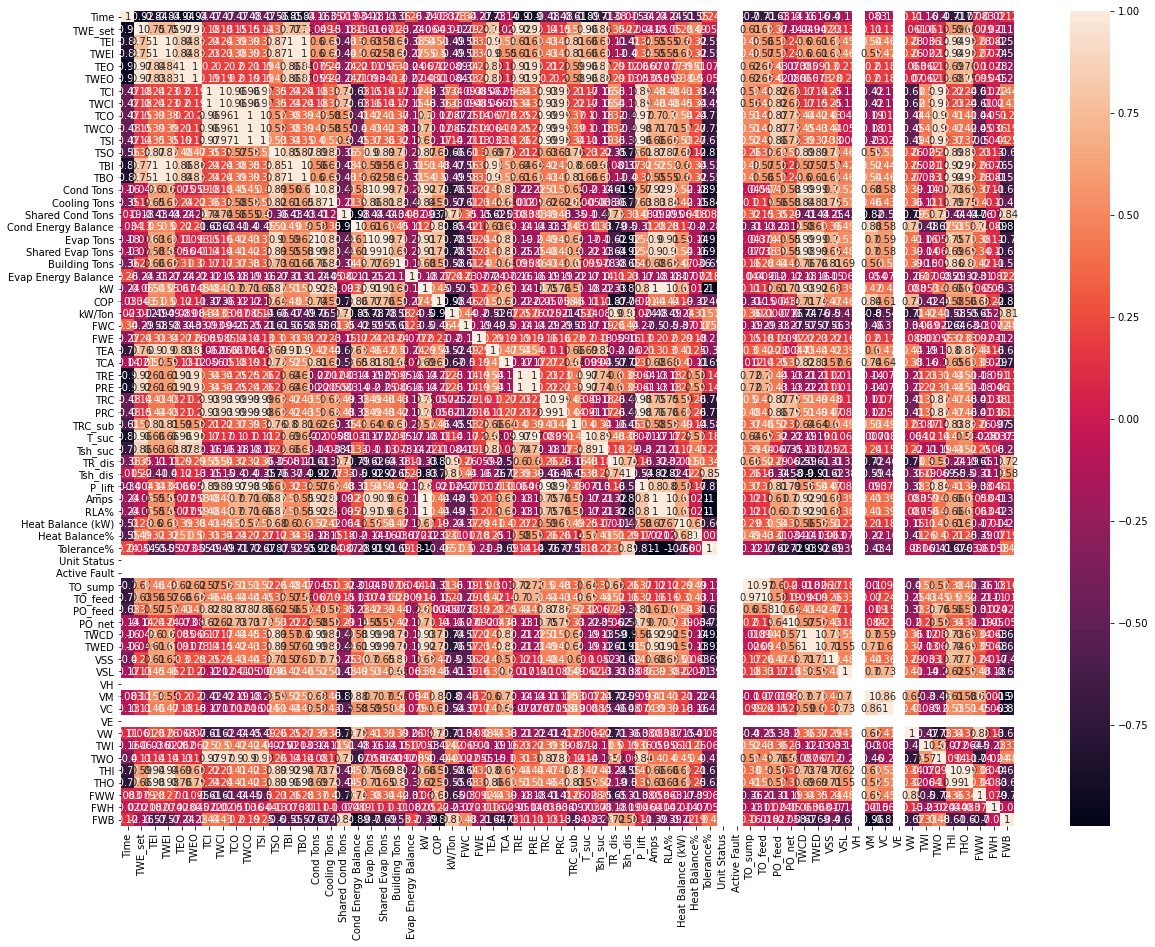

In [6]:
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

### Correlation Matrix - Variable with full charge gas

In [7]:
corrMatrix = dfNormal_without_outlier.corr()
corrMatrix

,Time,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,...,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB
Time,1.000000,-0.926060,-0.813357,-0.810538,-0.950592,-0.948986,-0.515443,-0.514930,-0.489104,-0.486797,...,0.030976,NaN,0.356275,0.836995,-0.469005,-0.681037,-0.753524,0.360386,-0.136602,-0.011948
TWE_set,-0.926060,1.000000,0.717079,0.714152,0.948955,0.954134,0.241614,0.239381,0.176736,0.171143,...,-0.064689,NaN,-0.159804,-0.855591,0.189267,0.578262,0.651882,-0.147801,0.067196,-0.011593
TEI,-0.813357,0.717079,1.000000,0.998404,0.854750,0.844523,0.265804,0.267304,0.398871,0.399348,...,0.364976,NaN,0.001898,-0.764024,0.233542,0.931215,0.978402,-0.029247,0.188951,-0.499234
TWEI,-0.810538,0.714152,0.998404,1.000000,0.853191,0.844042,0.259749,0.260901,0.392908,0.393817,...,0.374011,NaN,-0.006927,-0.759913,0.234873,0.932499,0.978014,-0.038903,0.188024,-0.503785
TEO,-0.950592,0.948955,0.854750,0.853191,1.000000,0.998853,0.298075,0.297003,0.280874,0.279929,...,0.044008,NaN,-0.190371,-0.869136,0.260380,0.710392,0.787907,-0.178905,0.084990,-0.126130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THI,-0.681037,0.578262,0.931215,0.932499,0.710392,0.700771,0.202794,0.206689,0.369572,0.371273,...,0.455571,NaN,0.131533,-0.687809,0.135397,1.000000,0.986071,0.083685,0.164119,-0.564283
THO,-0.753524,0.651882,0.978402,0.978014,0.787907,0.777959,0.237911,0.240835,0.392180,0.393126,...,0.418463,NaN,0.075883,-0.735318,0.183683,0.986071,1.000000,0.034319,0.187784,-0.541918
FWW,0.360386,-0.147801,-0.029247,-0.038903,-0.178905,-0.180966,-0.770733,-0.776228,-0.662917,-0.672699,...,0.341674,NaN,0.919887,0.056706,-0.829995,0.083685,0.034319,1.000000,-0.051415,-0.566872
FWH,-0.136602,0.067196,0.188951,0.188024,0.084990,0.087701,0.089249,0.090663,0.146427,0.143334,...,-0.072495,NaN,-0.023047,-0.164878,0.087837,0.164119,0.187784,-0.051415,1.000000,-0.074207


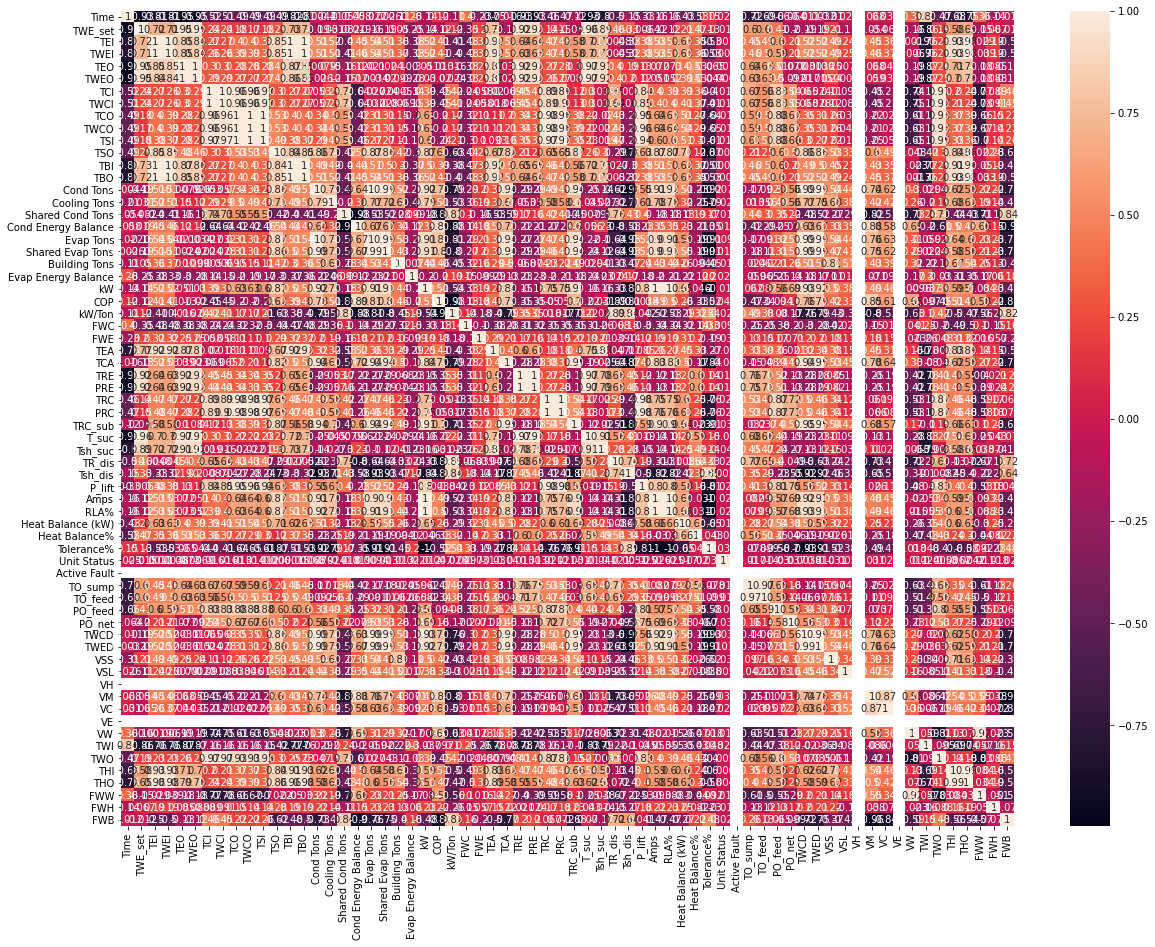

In [8]:
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

## PCA - REFRIGERANT 40% LEAKING

In [9]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
pca = decomposition.PCA()

## PCA - full charge refrigerant - Normalized

In [10]:
print(dfNormal_without_outlier.shape)
st_Normal = StandardScaler().fit_transform(dfNormal_without_outlier)
pca = decomposition.PCA(0.80)
st_Normal80 = pca.fit_transform(st_Normal) # << to retain the components in an object
print(st_Normal80.shape)

(4663, 3)


In [11]:
#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  3 ;
Total explained variance =  0.81181


In [12]:
st_Normal = StandardScaler().fit_transform(dfNormal_without_outlier)
pca = decomposition.PCA(0.90)
st_Normal90 = pca.fit_transform(st_Normal) # << to retain the components in an object
print(st_Normal90.shape)

(4663, 7)


In [13]:
#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  7 ;
Total explained variance =  0.90686
